## EDA and Feature Engineering on the Flight Price Dataset
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_excel('flight_price.xlsx')
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#get the basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


there are 10863 rows of data with 11 columns.
 10 of them are object type.we need to convert it to numerical

In [4]:
#describe fun works for numerical features.here we have only one numerical feature ,price
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Feature Engineering

## Date_of_Journey 



##### Date_of_Journey is in object format. separate date ,month and year 

In [5]:
#df['Date_of_Journey'] is giving o/p as 24/03/2019 format.so we are going to extract date ,month and year seperately 

#df['Date']=df['Date_of_Journey'].str.split('/') it will give o/p as [24, 03, 2019] .we need to extract date specifically and hence use str[0] .Now we will get 24

df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Date']

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date, Length: 10683, dtype: object

In [6]:
#similarly capture month and year

df['Month']=df['Date_of_Journey'].str.split("/").str[1]
df['Year']=df['Date_of_Journey'].str.split("/").str[2]

In [7]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


Separate columns for date, month, and year have been added.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


##### convert Date,Month and year into numerical format and drop Date_of_Journey

In [9]:
#convert Date,Month and year into numerical format
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


converted Date,Month and year(object types) into numerical format.
since we created sepeate DATE ,MONTH,YEAR column ,drop the Date_of_Journey column .

In [11]:
#drop Date_of_Journey column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


## Arrival_Time

##### SPLIT Arrival_Time into HOUR ,and MINUTES

Arrival_Time is in obj format .FIRST SPLIT Arrival_Time into HOUR ,and MINUTES.then convert.

but Arrival_Minute is having 01:10 22 Mar ,convert it to 01:10 ( splits the string x into a list of substrings based on the delimiter ' ' (a space).)

For example, if x is 01:10 22 Mar, x.split(' ') would produce [01:10, 22, Mar]. pick only 01:10 ie [0]

In [13]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019


In [14]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(":").str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(":").str[1]

In [15]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


created Arrival_Hour and Arrival_Minute columns have been created.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  object
 14  Arrival_Minute   10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


##### convert Arrival_Hour, Arrival_Minute into numerical format and drop Arrival_Time column

In [17]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df.drop(['Arrival_Time'],axis=1,inplace=True)


In [18]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


## Dep_Time

##### SPLIT Dep_Time into HOUR ,and MINUTES

In [19]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_Minute   10683 non-null  int64 
 14  Dep_Hour         10683 non-null  object
 15  Dep_Minute       10683 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


##### convert Dep_Hour and Dep_Minute to Numerical format and drop Dep_Time

In [20]:
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [21]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_Hour     10683 non-null  int64 
 12  Arrival_Minute   10683 non-null  int64 
 13  Dep_Hour         10683 non-null  int64 
 14  Dep_Minute       10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


## Duration

In [23]:
df['Duration'].isnull().sum()

np.int64(0)

df['Duration_Hour']=df['Duration'].str.split(" ").str[0]          #o/p for first record will be 2h. now we need ot remove h from 2h.

df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h')         # o/p for first record will be [2,] .pick [0] 

df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]        #o/p for first record will be 2

In [24]:
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_Minute']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]


In [25]:
unique_values = df['Duration_Hour'].unique()
unique_values

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

here we have an outlier '5m'

In [26]:
#df[df['Duration'] == '5m'] #6474 Row is giving 5m incorrect data
df[df['Duration_Hour'] == '5m']  #getting 5m in Duration_Hour data


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [27]:
specific_route_df = df[df['Route'] == 'BOM → GOI → PNQ → HYD']
specific_route_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,4h 15m,2 stops,No info,16172,12,3,2019,16,55,21,10,4,15
5309,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,4h 15m,2 stops,No info,17327,6,3,2019,16,55,21,10,4,15
5942,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,11h 50m,2 stops,No info,16172,12,3,2019,16,55,5,5,11,50
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN
7456,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,11h 50m,2 stops,No info,16697,6,3,2019,16,55,5,5,11,50
8478,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,3h 25m,2 stops,No info,18797,6,3,2019,16,55,13,30,3,25


<Axes: xlabel='Duration', ylabel='Count'>

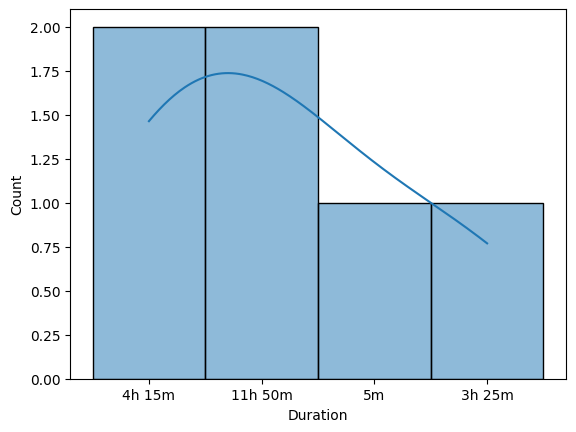

In [28]:
sns.histplot(specific_route_df['Duration'],kde=True)

In [29]:
specific_route_df['Duration_Hour'] = specific_route_df['Duration_Hour'].replace('5m', '0')
specific_route_df['Duration_Hour'] = specific_route_df['Duration_Hour'].astype(int)

/var/folders/q9/jzs4zr2n0nbfwsb868999z9w0000gn/T/ipykernel_2096/3290703607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_route_df['Duration_Hour'] = specific_route_df['Duration_Hour'].replace('5m', '0')
/var/folders/q9/jzs4zr2n0nbfwsb868999z9w0000gn/T/ipykernel_2096/3290703607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_route_df['Duration_Hour'] = specific_route_df['Duration_Hour'].astype(int)


The median was chosen over the mode and mean because it provides a robust, reliable 

measure of central tendency in the presence of outliers and skewed data distributions, which is common in flight duration data.

In [30]:
median_duration = specific_route_df['Duration_Hour'].median()
median_duration

np.float64(4.0)

In [31]:
median_duration = int(median_duration) 
median_duration

4

In [32]:
df['Duration_Hour'] = df['Duration_Hour'].replace('5m', str(median_duration))

In [33]:
unique_values = df['Duration_Hour'].unique()
unique_values

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [34]:
unique_values = df['Duration_Minute'].unique()
unique_values

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

replace Nan with 0 (0 MINUTE)

In [35]:
# replace Nan with 0 (0 MINUTE)
#df['Duration_Minute'].replace(np.nan,0,inplace=True)
df['Duration_Minute'] = df['Duration_Minute'].fillna(0)
df['Duration_Minute']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_Minute, Length: 10683, dtype: object

##### convert Duration_Hour $ Duration_Minute to numerical format .drop Duration column 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_Hour     10683 non-null  int64 
 12  Arrival_Minute   10683 non-null  int64 
 13  Dep_Hour         10683 non-null  int64 
 14  Dep_Minute       10683 non-null  int64 
 15  Duration_Hour    10683 non-null  object
 16  Duration_Minute  10683 non-null  object
dtypes: int64(8), object(9)
memory u

In [37]:
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_Minute']=df['Duration_Minute'].astype(int)
df.drop('Duration',axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Arrival_Hour     10683 non-null  int64 
 11  Arrival_Minute   10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Minute       10683 non-null  int64 
 14  Duration_Hour    10683 non-null  int64 
 15  Duration_Minute  10683 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.3+ MB


## Catogorical Features
## Total_Stops

In [39]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [40]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [41]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,2019,9,25,9,45,23,40


In [42]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

replace nan value with mode and 
non-stop =0, 
1 stop=1, 
2 stops=2,
3 stops=3,
4 stops=4

In [43]:
#replace nan value
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2, '3 stops':3, '4 stops':4,np.nan:1})
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute


In [44]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,7,25


## Route

In [45]:
#since we have source and destination column drop the ROUTE column
df.drop('Route',axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25


## Apply one-hot encoding to the remaining categorical values (Airline, Source, Destination, Additional_Info).

In [46]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [47]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [48]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray()
encoded_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [51]:
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
encoded_df

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline_Air Asia                              10683 non-null  float64
 1   Airline_Air India                             10683 non-null  float64
 2   Airline_GoAir                                 10683 non-null  float64
 3   Airline_IndiGo                                10683 non-null  float64
 4   Airline_Jet Airways                           10683 non-null  float64
 5   Airline_Jet Airways Business                  10683 non-null  float64
 6   Airline_Multiple carriers                     10683 non-null  float64
 7   Airline_Multiple carriers Premium economy     10683 non-null  float64
 8   Airline_SpiceJet                              10683 non-null  float64
 9   Airline_Trujet                                10683 non-null 

In [53]:
# Convert all columns in encoded_df to integer type
encoded_df = encoded_df.astype(int)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Airline_Air Asia                              10683 non-null  int64
 1   Airline_Air India                             10683 non-null  int64
 2   Airline_GoAir                                 10683 non-null  int64
 3   Airline_IndiGo                                10683 non-null  int64
 4   Airline_Jet Airways                           10683 non-null  int64
 5   Airline_Jet Airways Business                  10683 non-null  int64
 6   Airline_Multiple carriers                     10683 non-null  int64
 7   Airline_Multiple carriers Premium economy     10683 non-null  int64
 8   Airline_SpiceJet                              10683 non-null  int64
 9   Airline_Trujet                                10683 non-null  int64
 10  Airline_Vi

In [54]:
df.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_Stops      10683 non-null  int64
 1   Price            10683 non-null  int64
 2   Date             10683 non-null  int64
 3   Month            10683 non-null  int64
 4   Year             10683 non-null  int64
 5   Arrival_Hour     10683 non-null  int64
 6   Arrival_Minute   10683 non-null  int64
 7   Dep_Hour         10683 non-null  int64
 8   Dep_Minute       10683 non-null  int64
 9   Duration_Hour    10683 non-null  int64
 10  Duration_Minute  10683 non-null  int64
dtypes: int64(11)
memory usage: 918.2 KB


#### merge encoded_df and df to get final_df

In [55]:
final_df = pd.concat([df, encoded_df], axis=1)

In [56]:
final_df

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,...,0,0,0,0,0,0,0,0,1,0
10679,0,4145,27,4,2019,23,20,20,45,2,...,0,0,0,0,0,0,0,0,1,0
10680,0,7229,27,4,2019,11,20,8,20,3,...,0,0,0,0,0,0,0,0,1,0
10681,0,12648,1,3,2019,14,10,11,30,2,...,0,0,0,0,0,0,0,0,1,0


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10683 non-null  int64
 1   Price                                         10683 non-null  int64
 2   Date                                          10683 non-null  int64
 3   Month                                         10683 non-null  int64
 4   Year                                          10683 non-null  int64
 5   Arrival_Hour                                  10683 non-null  int64
 6   Arrival_Minute                                10683 non-null  int64
 7   Dep_Hour                                      10683 non-null  int64
 8   Dep_Minute                                    10683 non-null  int64
 9   Duration_Hour                                 10683 non-null  int64
 10  Duration_M

all categorical values are converted into numerical values